In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
def get_data(path):
    df = pd.read_hdf(path)
    data = df[(df.ValueDateTime.dt.year == 2022) & (df.ValueDateTime.dt.month == 1) & (df.ValueDateTime.dt.week == 1)]
    data['TimeDelta_h'] = (data['ValueDateTime'] - data['ForecastDateTime']).astype('timedelta64[h]').astype(int)
    data['TimeDelta_d'] = data['TimeDelta_h']/24
    return data

In [3]:
BEL = get_data("Temp/BEL_TEMP_GEFS.h5");
ITA = get_data("Temp/ITA_TEMP_EC15.h5");
# GBR = get_data("Temp/GBR_TEMP_EC15.h5");
DEU_EC15 = get_data("Temp/DEU_TEMP_EC15.h5");
DEU_GEFS = get_data("Temp/DEU_TEMP_GEFS.h5");

<ipython-input-2-c800c2ab819f>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data = df[(df.ValueDateTime.dt.year == 2022) & (df.ValueDateTime.dt.month == 1) & (df.ValueDateTime.dt.week == 1)]
<ipython-input-2-c800c2ab819f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TimeDelta_h'] = (data['ValueDateTime'] - data['ForecastDateTime']).astype('timedelta64[h]').astype(int)
<ipython-input-2-c800c2ab819f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [4]:
def get_means(data):
    dataMean = data.groupby(["ValueDateTime", "TimeDelta_h"])["value"].mean().reset_index()
    dataStd = data.groupby(["ValueDateTime", "TimeDelta_h"])["value"].std().reset_index()
    dataMean['+1std'] = dataMean['value'] + dataStd['value']
    dataMean['-1std'] = dataMean['value'] - dataStd['value']
    return dataMean

In [5]:
Belgium = get_means(BEL);
Italy = get_means(ITA);
# England = get_means(GBR);
Ger_EC15 = get_means(DEU_EC15);
Ger_GEFS = get_means(DEU_GEFS);

In [6]:
# Still need to get names in 
def plot_forecasts(dfs, horizons):
    for df in dfs:
        fig, ax = plt.subplots(figsize=(20,10))
        # True values
        plt.plot(df[df.TimeDelta_h==0]["ValueDateTime"], df[df.TimeDelta_h==0]["value"], label='True value', color="black") 
        for horizon in horizons:
            plt.plot(df[df.TimeDelta_h==horizon]["ValueDateTime"],
                                                             df[df.TimeDelta_h==horizon]["value"], label=r"$horizon$hr forecast")
            plt.fill_between(df[df.TimeDelta_h==horizon]["ValueDateTime"], 
                                                            df[df.TimeDelta_h==horizon]["+1std"],
                                                            df[df.TimeDelta_h==horizon]["-1std"], alpha=0.2)

        ax.set_ylabel("Temperature", fontsize = 16)
        ax.set_xlabel("Forecast date", fontsize = 15)

        ax.set_title("Std. Dev. of different forecast horizons", fontsize = 15)
        ax.legend(fontsize = 15)
        ax.grid('on')
        plt.show()

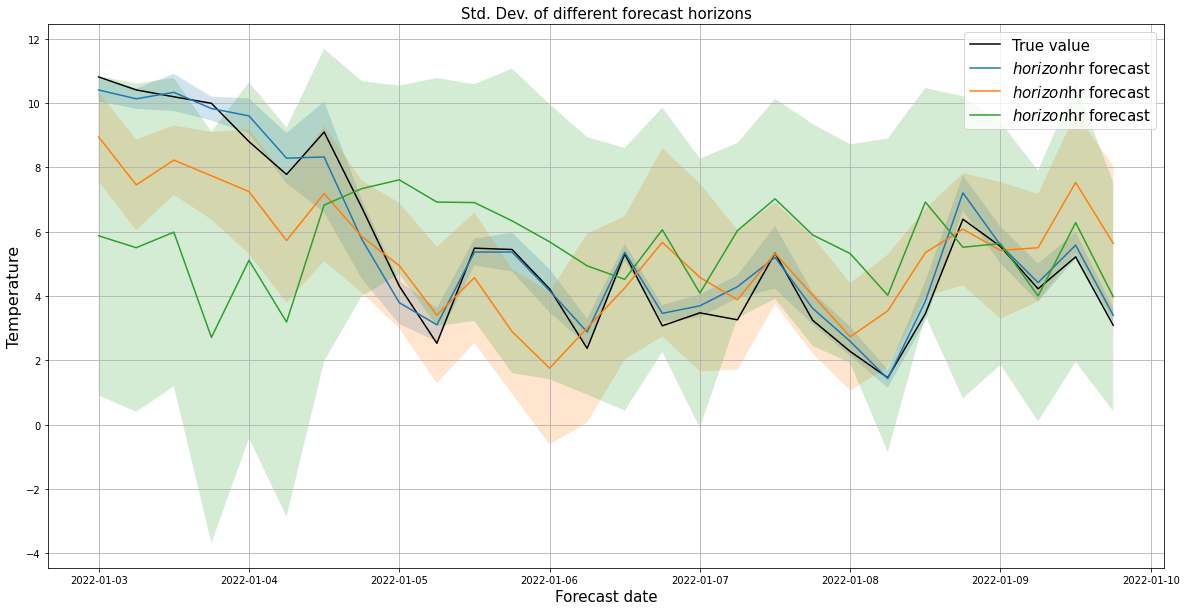

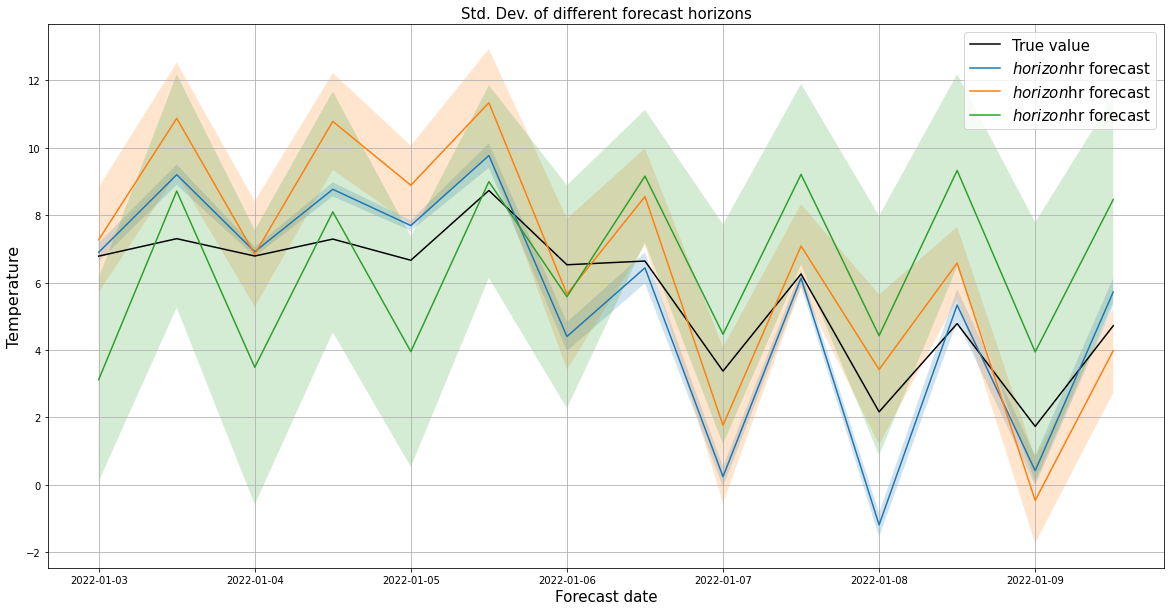

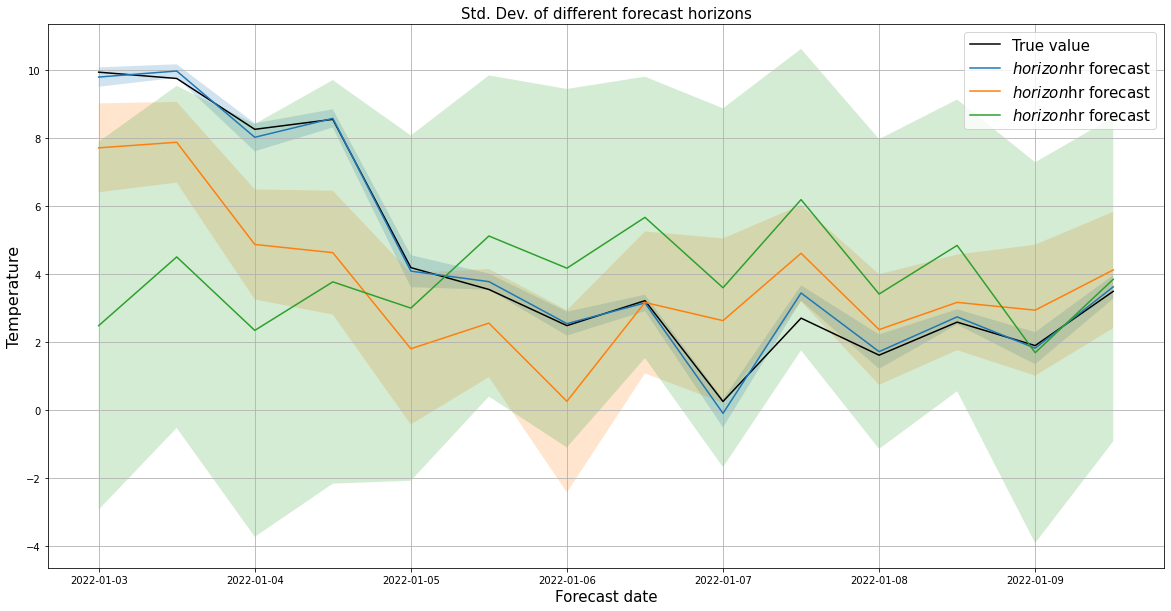

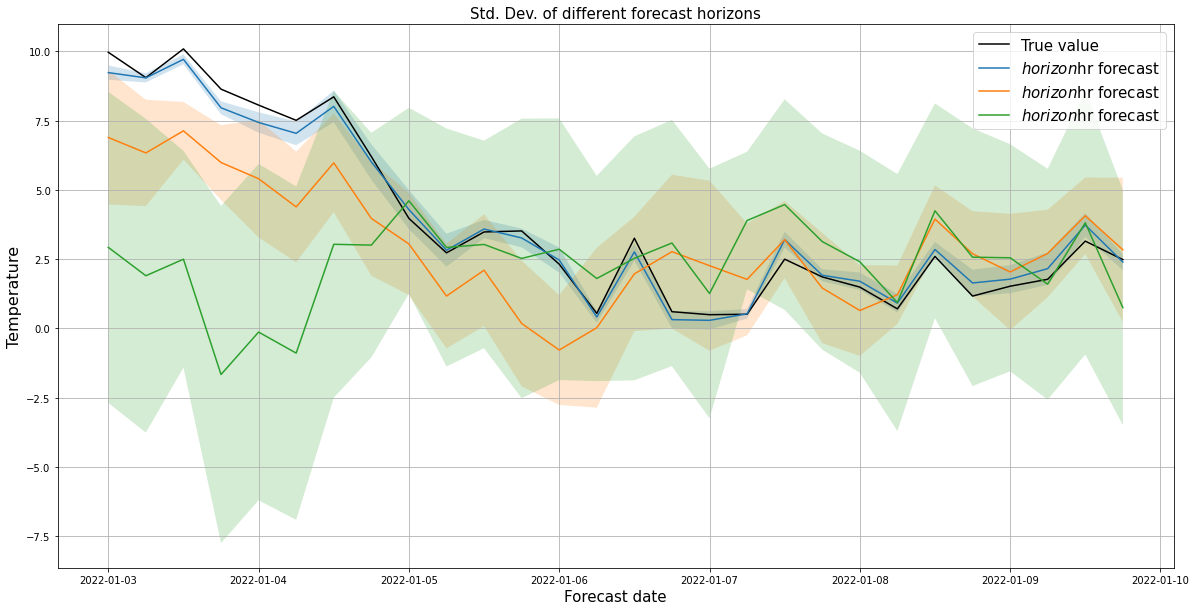

In [7]:
plot_forecasts([Belgium, Italy, Ger_EC15, Ger_GEFS], [24, 24*7, 24*14])

In [8]:
def get_coverage(df, horizon):
    count = 0
    df_true = df[df.TimeDelta_h==0]
    df_horizon = df[df.TimeDelta_h==horizon]
    for i in df_true["ValueDateTime"]:
        true_val = float(df_true[df.ValueDateTime==i]["value"])
        if (true_val > float(df_horizon[df.ValueDateTime==i]["-1std"])):
            count+=1
    return count/len(df_true["ValueDateTime"])

In [9]:
get_coverage(Belgium, 24)

<ipython-input-8-d5e68725872c>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_val = float(df_true[df.ValueDateTime==i]["value"])
<ipython-input-8-d5e68725872c>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if (true_val > float(df_horizon[df.ValueDateTime==i]["-1std"])):


0.75

In [10]:
get_coverage(Italy, 24)

<ipython-input-8-d5e68725872c>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_val = float(df_true[df.ValueDateTime==i]["value"])
<ipython-input-8-d5e68725872c>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if (true_val > float(df_horizon[df.ValueDateTime==i]["-1std"])):


0.5714285714285714

In [11]:
get_coverage(Ger_EC15, 24)

<ipython-input-8-d5e68725872c>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_val = float(df_true[df.ValueDateTime==i]["value"])
<ipython-input-8-d5e68725872c>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if (true_val > float(df_horizon[df.ValueDateTime==i]["-1std"])):


0.8571428571428571

In [12]:
get_coverage(Ger_GEFS, 24)

<ipython-input-8-d5e68725872c>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_val = float(df_true[df.ValueDateTime==i]["value"])
<ipython-input-8-d5e68725872c>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if (true_val > float(df_horizon[df.ValueDateTime==i]["-1std"])):


0.9285714285714286